## E-commerce Customer Churn Analysis and Prediction

### Project Overview

In this project, we are conducting an in-depth analysis of e-commerce customer churn and build predictive models to forecast customer behavior. Customer churn, often referred to as customer attrition, is the phenomenon where customers cease their relationship with a business or service. In the context of e-commerce, customer churn occurs when customers stop making purchases or engaging with the platform. Understanding and addressing customer churn is crucial for e-commerce businesses as it directly impacts revenue and profitability.
    
[About this dataset](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction/data)
    
Why is customer churn analysis important for businesses:
1. Revenue Impact: Losing existing customers is more costly than retaining them. It's often more expensive to acquire new customers than to retain current ones. Reducing churn can lead to increased revenue.
2. Customer Lifetime Value (CLV): Long-term customers contribute more to a business's profitability. Reducing churn can boost CLV, which is a key metric for business success.
3. Competitive Advantage: E-commerce is a highly competitive industry. Businesses that can effectively reduce churn and retain customers gain a competitive edge.
4. Data-Driven Decision Making: Analysing customer churn data can lead to insights that drive strategic decisions, such as improving customer service, personalisation, and marketing efforts.

### Data dictionary
- **CustomerID:** Unique customer identifier.
- **Churn:** Churn flag (0 represents customers who have not churned, 1 represents customers who have churned).
- **Tenure:** Tenure of the customer in the organization.
- **PreferredLoginDevice:** Preferred login device of the customer.
- **CityTier:** City tier of the customer.
- **WarehouseToHome:** Distance between the warehouse and the customer's home.
- **PreferredPaymentMode:** Preferred payment method of the customer.
- **Gender:** Gender of the customer.
- **HourSpendOnApp:** Number of hours spent on the mobile application or website.
- **NumberOfDeviceRegistered:** Total number of devices registered by the customer.
- **PreferedOrderCat:** Preferred order category of the customer in the last month.
- **SatisfactionScore:** Satisfaction score of the customer on service.
- **MaritalStatus:** Marital status of the customer.
- **NumberOfAddress:** Total number of addresses added by the customer.
- **Complain:** Whether any complaint has been raised in the last month.
- **OrderAmountHikeFromlastYear:** Percentage increase in order amount from the last year.
- **CouponUsed:** Total number of coupons used in the last month.
- **OrderCount:** Total number of orders placed in the last month.
- **DaySinceLastOrder:** Days since the last order by the customer.
- **CashbackAmount:** Average cashback received in the last month.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

#import warnings
#warnings.simplefilter(action='ignore')

## EDA

In [2]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
df.sample(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4593,54594,0,6.0,Mobile Phone,3,17.0,E wallet,Female,4.0,5,Fashion,1,Married,4,1,20.0,1.0,2.0,NaN,215.71
5620,55621,0,3.0,Mobile Phone,1,35.0,Credit Card,Female,4.0,5,Mobile Phone,5,Single,3,0,15.0,1.0,2.0,5.0,162.85
1817,51818,0,10.0,Mobile Phone,1,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,4,Married,7,0,12.0,4.0,4.0,3.0,164.47
2902,52903,0,1.0,Computer,3,27.0,Debit Card,Female,3.0,4,Laptop & Accessory,3,Single,3,0,15.0,2.0,2.0,NaN,224.81
4438,54439,0,1.0,Computer,1,7.0,Debit Card,Female,3.0,4,Laptop & Accessory,4,Married,3,0,21.0,2.0,2.0,5.0,188.97
2878,52879,0,8.0,Computer,1,9.0,Debit Card,Male,3.0,5,Laptop & Accessory,3,Divorced,3,0,18.0,1.0,2.0,NaN,220.47
479,50480,0,15.0,Phone,1,35.0,Debit Card,Male,3.0,3,Laptop & Accessory,4,Divorced,2,0,13.0,2.0,7.0,8.0,144.34
4876,54877,0,15.0,Computer,1,16.0,Credit Card,Male,4.0,4,Others,3,Married,4,0,NaN,1.0,2.0,12.0,319.19
4000,54001,0,31.0,Computer,1,22.0,Debit Card,Male,3.0,4,Grocery,3,Married,4,1,15.0,NaN,3.0,3.0,282.87
4745,54746,1,1.0,Phone,1,13.0,Debit Card,Male,4.0,2,Mobile Phone,5,Married,3,1,22.0,1.0,2.0,1.0,141.01


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
# Categorical columns
cat_cols = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
            'Gender', 'PreferedOrderCat',
            'MaritalStatus', 'Complain']  

# Numerical columns
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 
            'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'NumberOfDeviceRegistered', 
            'SatisfactionScore', 'NumberOfAddress']  

In [5]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [6]:
from sklearn.impute import KNNImputer

# Using KNN imputer for numerical features
imputer = KNNImputer(n_neighbors=5)

knn_fill_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
                 'OrderAmountHikeFromlastYear', 'CouponUsed', 
                 'OrderCount', 'DaySinceLastOrder']

df[knn_fill_cols] = imputer.fit_transform(df[knn_fill_cols])

print(df.isna().sum())

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


In [7]:
# Fill missing values using median for numerical columns
#fill_median_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

#df[fill_median_cols] = df[fill_median_cols].fillna(df[fill_median_cols].median())

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5630.0,10.079929,8.432039,0.0,3.00,9.00,15.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5630.0,15.647638,8.400511,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5630.0,2.920178,0.713189,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [9]:
df.select_dtypes(exclude=np.number).columns

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [10]:
df.select_dtypes(include=np.number).columns

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [11]:
df.describe(include='O')

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [12]:
# Combine identical categories
df.replace({'PreferredLoginDevice': {'Phone': 'Mobile Phone'},
            'PreferedOrderCat': {'Mobile': 'Mobile Phone'},
            'PreferredPaymentMode': {'COD': 'Cash on Delivery', 'CC': 'Credit Card'}}, 
           inplace=True)

for col in ['PreferredLoginDevice', 'PreferedOrderCat', 'PreferredPaymentMode']:
    print(df[col].value_counts(), '\n')

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64 

Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64 

Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64 



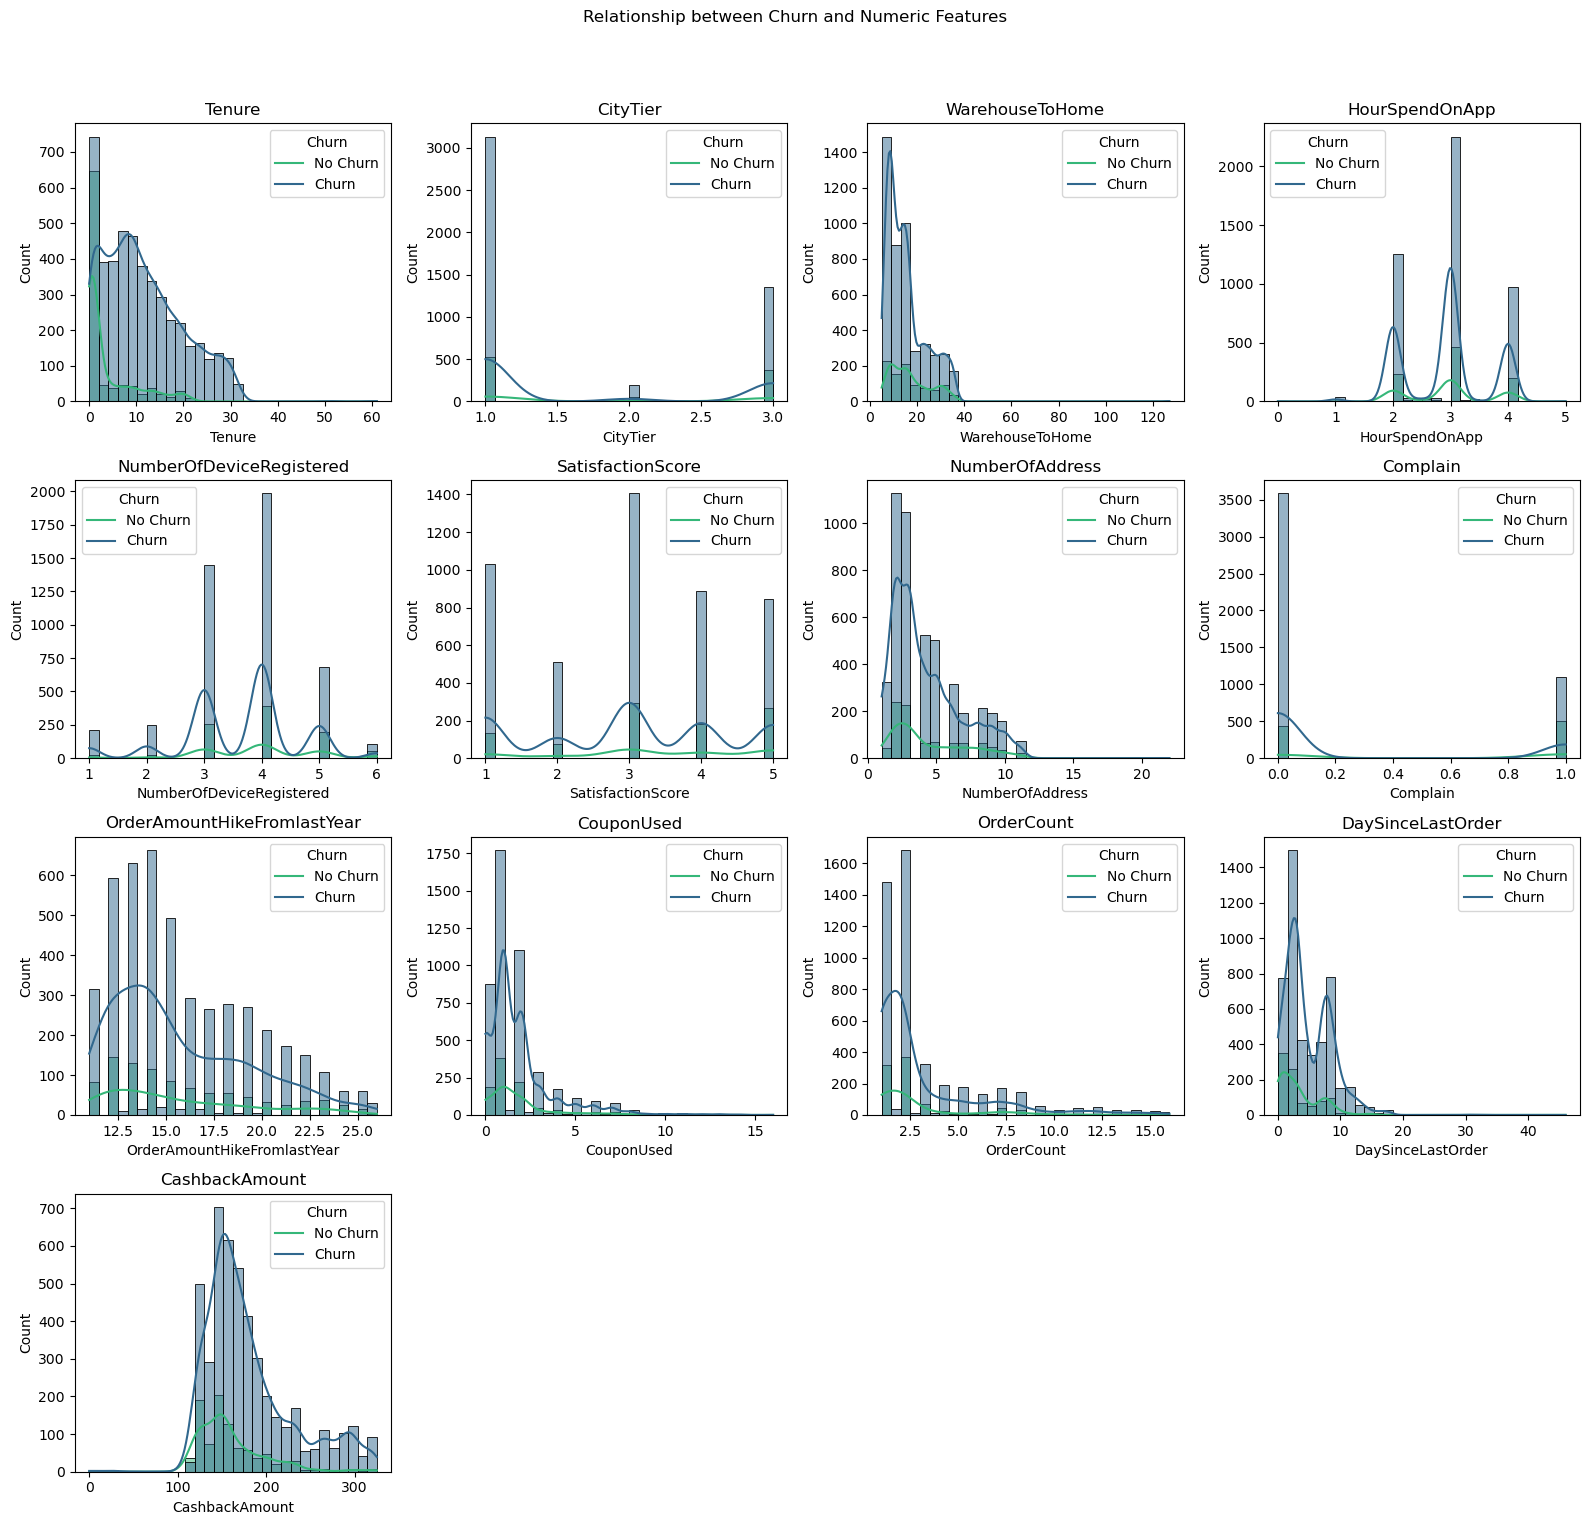

In [13]:
num_cols = df.select_dtypes(include=[np.number]).columns.drop(['CustomerID', 'Churn'])

# Subplot grid based on the number of numeric columns
n_cols = len(num_cols)
n_rows = (n_cols + 3) // 4  # Calculate number of rows

fig, axes = plt.subplots(n_rows, 4, figsize=(16, 16))  
fig.suptitle('Relationship between Churn and Numeric Features')

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, kde=True, hue='Churn', common_norm=False, ax=axes[i], palette='viridis', bins=30)
    axes[i].set_title(f'{col}')
    axes[i].legend(title='Churn', labels=['No Churn', 'Churn'])

# Remove any unused subplots (if the grid is larger than the number of columns)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

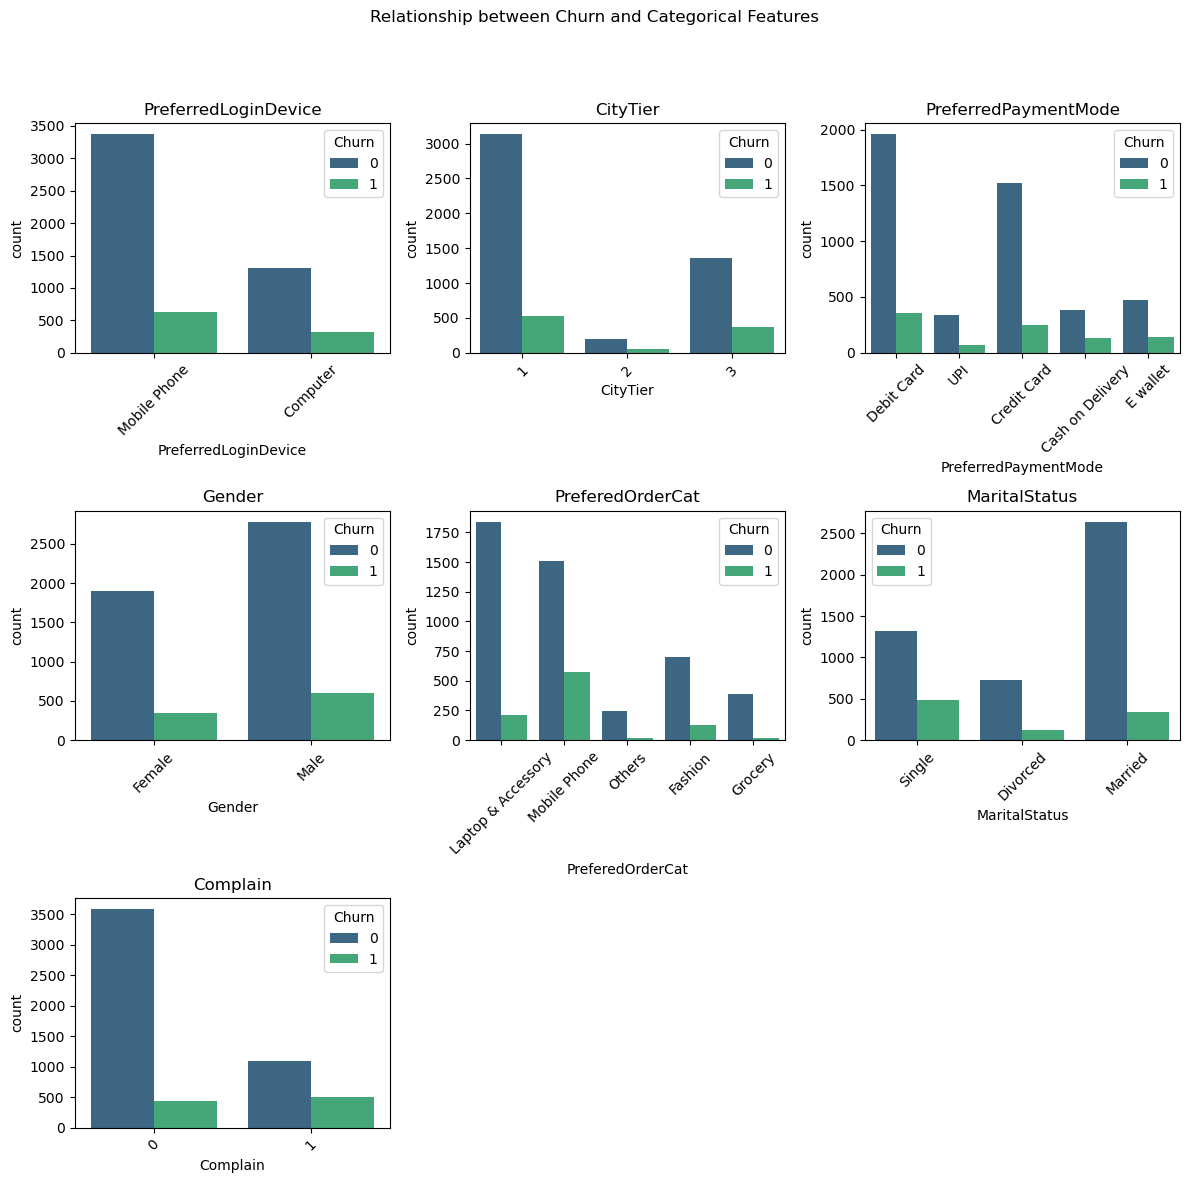

In [14]:
n_cols = len(cat_cols)
n_rows = (n_cols + 1) // 2

fig, axes = plt.subplots(n_rows, 3, figsize=(12, 16))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Relationship between Churn and Categorical Features')

axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i], palette='viridis')
    axes[i].set_title(f'{col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Remove any unused subplots (if the grid is larger than the number of columns)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

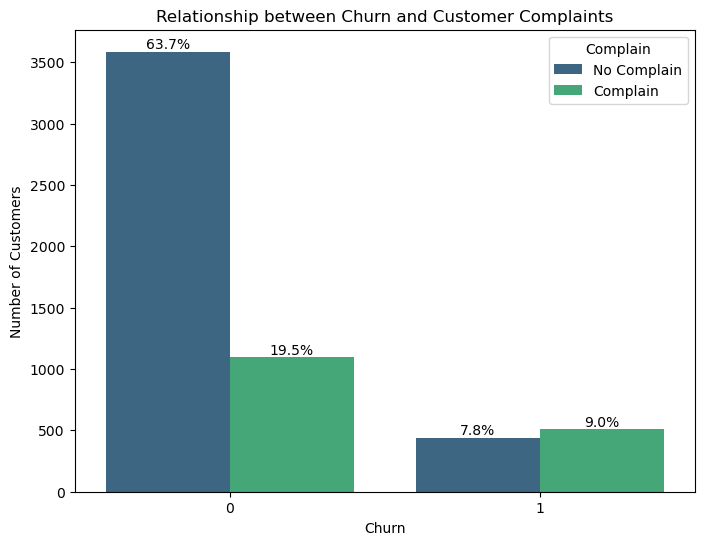

In [15]:
# Churn vs Complaints
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Churn', hue='Complain', palette='viridis')
plt.title('Relationship between Churn and Customer Complaints')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')

# Calculate and set y-axis ticks as percentages
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.legend(title='Complain', labels=['No Complain', 'Complain'])

# Save the plot as a JPG file
#plt.savefig('churn_vs_complain.jpg', dpi=300, bbox_inches='tight')

plt.show()

Analysis
- 9% of customers who raised a complaint eventually churned, while 19.5% of customers raised complaints but did not churn.
- Among customers who did not raise complaints, a significant portion still churned. Conversely, among those who raised complaints, some did churn while others did not.
- Analysing the reasons for complaints among customers who churned could provide insights into areas for improvement in customer service or product quality.

## Feature Engineering

### Customer Lifetime Value (CLV)
[Reference formula](https://delighted.com/blog/customer-lifetime-value-formula)

Limitations:
- As we do not have an explicit revenue column, we are are using 'OrderAmountHikeFromlastYear' as a proxy for the change in revenue.
- If revenue data is available, it would improve the accuracy of the CLV calculations.

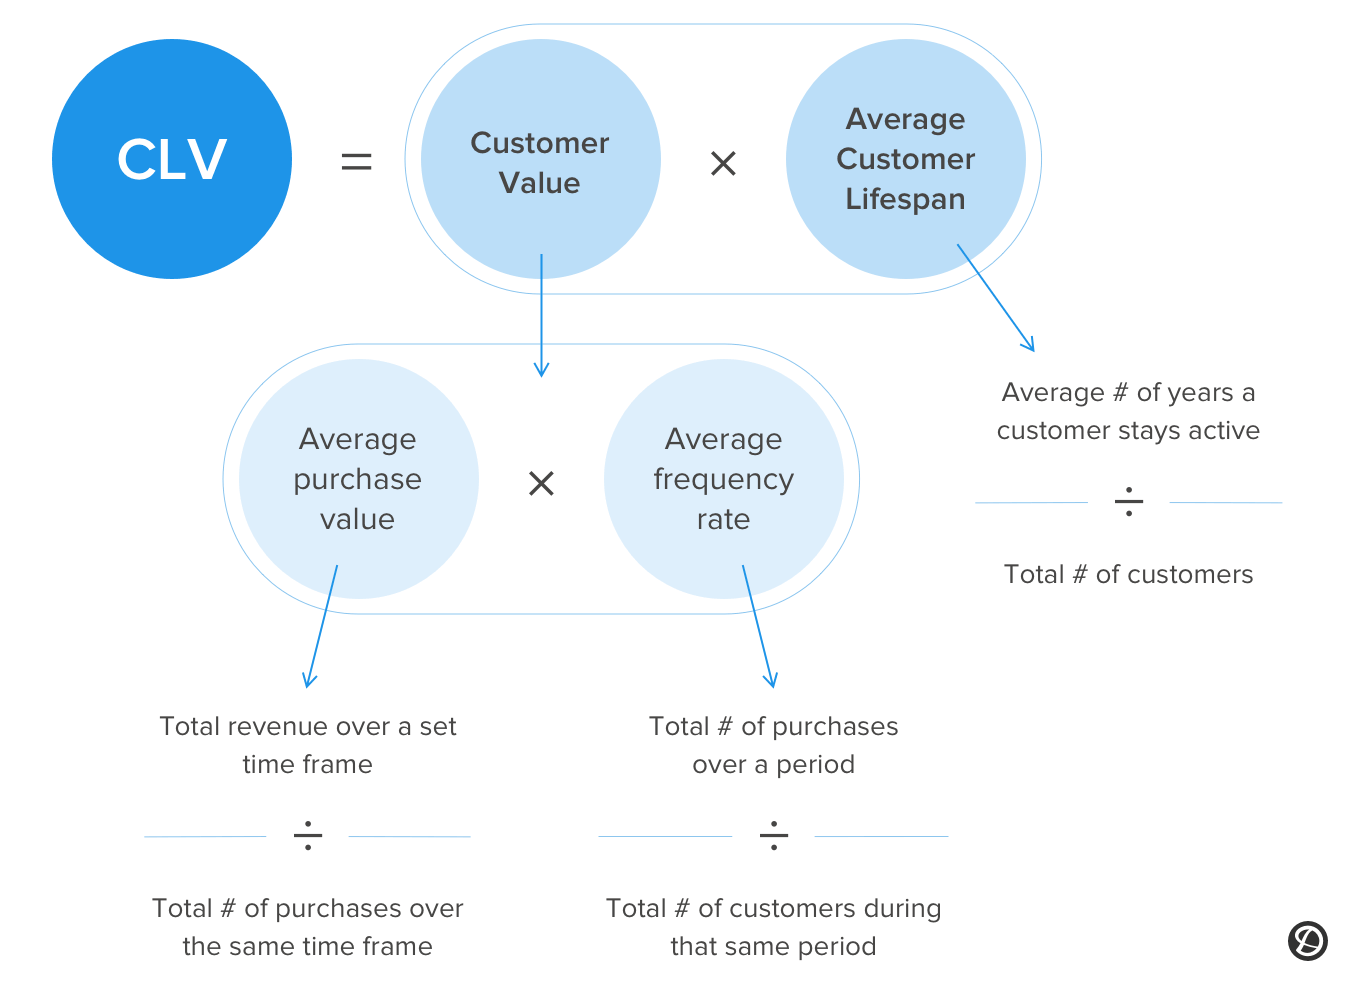

In [16]:
# Handle zero values in 'OrderCount' and 'Tenure' logically
# If OrderCount is 0, set AveragePurchaseValue to 0
df['AveragePurchaseValue'] = df['OrderAmountHikeFromlastYear'] / df['OrderCount']
df.loc[df['OrderCount'] == 0, 'AveragePurchaseValue'] = 0

# If Tenure is 0, set PurchaseFrequency to 0
df['PurchaseFrequency'] = df['OrderCount'] / df['Tenure']
df.loc[df['Tenure'] == 0, 'PurchaseFrequency'] = 0

# Customer Value calculation (AveragePurchaseValue * PurchaseFrequency)
df['CustomerValue'] = df['AveragePurchaseValue'] * df['PurchaseFrequency']

# CLV calculation (CustomerValue * Tenure)
df['CLV'] = df['CustomerValue'] * df['Tenure']

# Fill any NaN values with 0 (just to ensure no division issues)
df['CLV'].fillna(0, inplace=True)

df[['CustomerID', 'CLV']].head()

,CustomerID,CLV
0,50001,11.0
1,50002,15.0
2,50003,14.0
3,50004,0.0
4,50005,0.0


In [17]:
customer_groups = {1: 'Churned Customers',
                    0: 'Not Churned Customers'}

# 'CLV' vs 'Churn' summary statistics
for group, label in customer_groups.items():
    mean_clv = df[df['Churn'] == group]['CLV'].mean()
    median_clv = df[df['Churn'] == group]['CLV'].median()

    print(label)
    print('Mean CLV:', mean_clv)
    print('Median CLV:', median_clv, '\n')

Churned Customers
Mean CLV: 11.206329113924049
Median CLV: 13.0 

Not Churned Customers
Mean CLV: 14.927680478428021
Median CLV: 14.6 



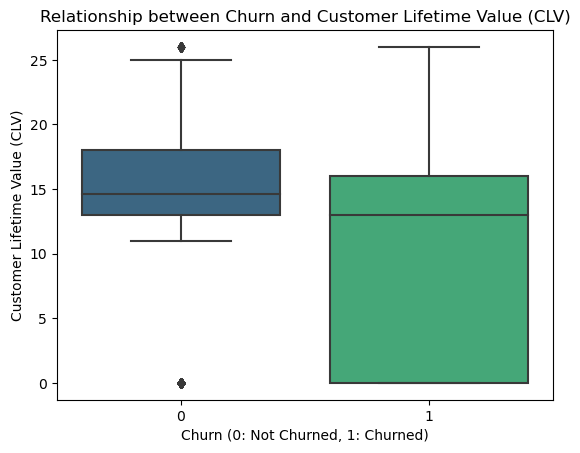

In [18]:
# Churn vs CLV

sns.boxplot(data=df, x='Churn', y='CLV', palette='viridis')
plt.title('Relationship between Churn and Customer Lifetime Value (CLV)')
plt.xlabel('Churn (0: Not Churned, 1: Churned)')
plt.ylabel('Customer Lifetime Value (CLV)')

plt.show()

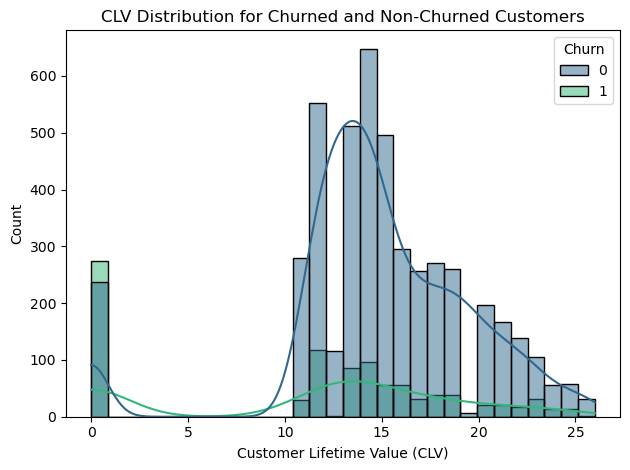

In [19]:
# CLV distribution for churned and non-churned customers

sns.histplot(data=df, x='CLV', hue='Churn', bins=30, kde=True, palette='viridis')
plt.title('CLV Distribution for Churned and Non-Churned Customers')
plt.xlabel('Customer Lifetime Value (CLV)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Analysis
- The distribution of CLV for non-churned customers is skewed towards higher values, indicating that customers with higher CLV tend to stay with the business.
- Most non-churned customers have CLV values above 100, confirming that valuable customers are more likely to remain loyal.
- Churned customers tend to have lower CLV values, with most customers having a CLV below 50.

This visualization reinforces that CLV is an important factor in predicting customer churn. Customers with low CLV are at a higher risk of churning, and this insight can be leveraged for targeted retention strategies. 

In [20]:
selected_features = ['Churn', 'CLV', 'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 
                     'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'SatisfactionScore', 
                     'NumberOfAddress', 'Complain']

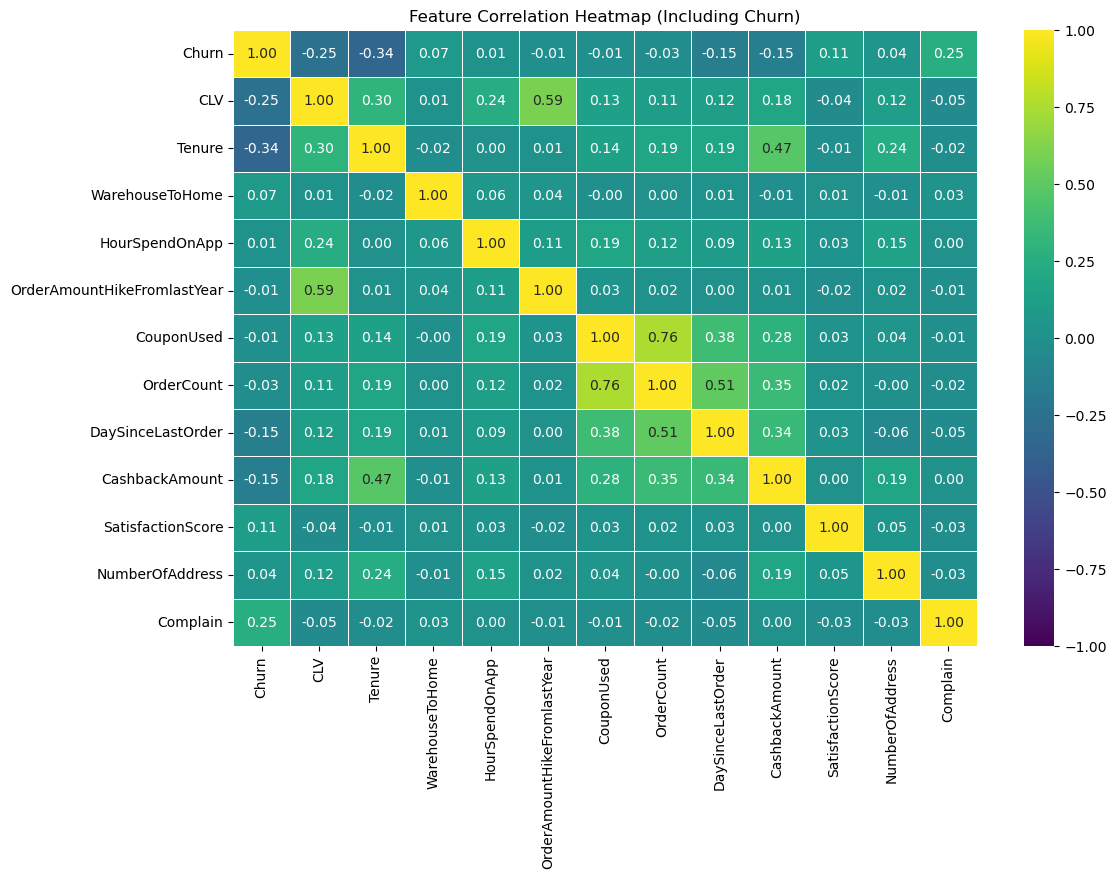

In [21]:
corr_matrix = df[selected_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap (Including Churn)')

plt.show()

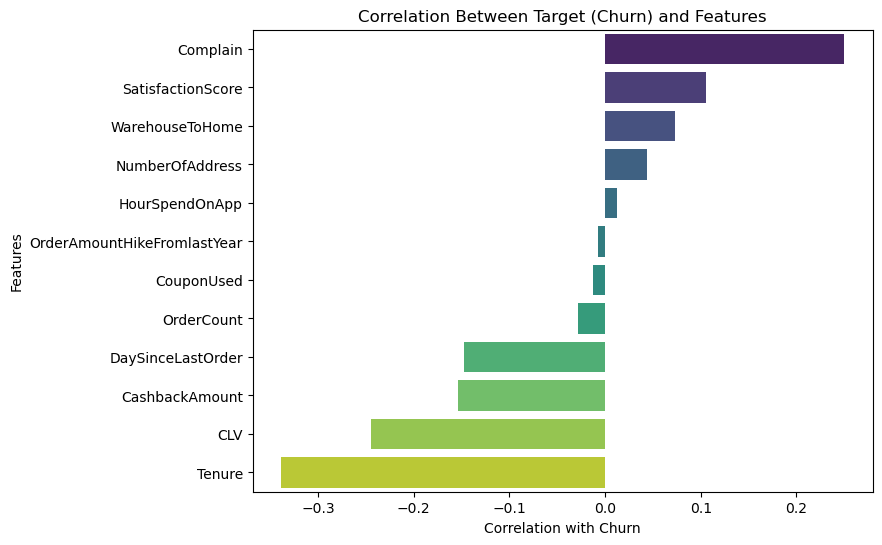

In [22]:
# Exclude 'Churn', 'AveragePurchaseValue', 'PurchaseFrequency', and 'CustomerValue'
corr_matrix = df[['CLV', 'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 
                  'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'SatisfactionScore', 
                  'NumberOfAddress', 'Complain']].corrwith(df['Churn'])

churn_corr = corr_matrix.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=churn_corr, y=churn_corr.index, palette='viridis')
plt.title('Correlation Between Target (Churn) and Features')
plt.xlabel('Correlation with Churn')
plt.ylabel('Features')

# Save the plot as a JPG file
#plt.savefig('target_vs_features.jpg', dpi=300, bbox_inches='tight')

plt.show()

Analysis
- Complain is positively correlated with churn, reinforcing that customers who lodge complaints are more likely to churn.
- Tenure and 'SatisfactionScore' are negatively correlated with churn, indicating that long-term and satisfied customers are less likely to leave.
- CLV is also negatively correlated with churn, showing that higher lifetime value tends to reduce the likelihood of churn.
- OrderCount, CashbackAmount, and CouponUsed show positive correlations with each other, suggesting that customers with higher engagement (more orders, cashback, coupons) are more valuable.

## Modelling

In [23]:
# Set seed for reproducibility
seed = 42
np.random.seed(seed)

cat_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain']
num_cols = ['CLV', 'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 
            'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'SatisfactionScore', 
            'NumberOfAddress']

In [24]:
X = df[cat_cols + num_cols]
y = df['Churn']

In [25]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

In [26]:
# Create preprocessing steps for both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)])

models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=seed),
    'Support Vector Machine': SVC(kernel='linear', probability=True, random_state=seed),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=seed)
}

In [27]:
# Function to calculate evaluation metrics
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    metrics = {
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test),
        'Recall': recall_score(y_test, y_pred_test),
        'F1 Score': f1_score(y_test, y_pred_test),
        'ROC AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    }
    
    cm = confusion_matrix(y_test, y_pred_test)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    return metrics

In [28]:
# Reference from ScikitLearn documentation

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

In [29]:
# ROC curve function
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(8, 6))
    
    for name, model in models.items():
        # Predict probabilities for the positive class (1)
        y_proba = model.predict_proba(X_test)[:, 1]
        
        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Comparison of Models')
    plt.legend(loc="lower right")
    plt.show()

# Learning Curve function
def plot_learning_curve(models, X_train, y_train, cv):
    for name, model in models.items():
        fig, ax = plt.subplots()
        LearningCurveDisplay.from_estimator(model, X_train, y_train, cv=cv, n_jobs=-1, ax=ax)
        ax.set_title(f'Learning Curve for {name}')
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles[:2], ['Training score', 'Cross-validation score'])
        plt.show()

# Cross-validation strategy
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=seed)

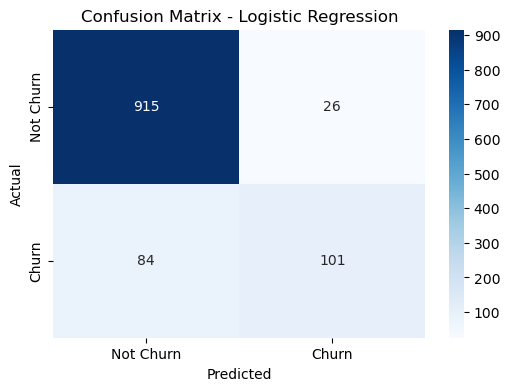

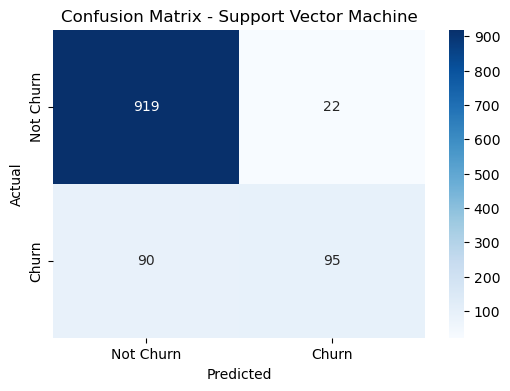

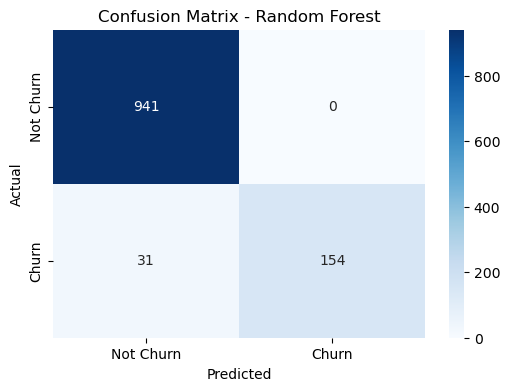

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.880329,0.902309,0.795276,0.545946,0.647436,0.891639
Support Vector Machine,0.881661,0.900533,0.811966,0.513514,0.629139,0.890617
Random Forest,1.000000,0.972469,1.000000,0.832432,0.908555,0.989864


In [30]:
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipeline.fit(X_train, y_train)
    
    metrics = evaluate_model(pipeline, name, X_train, X_test, y_train, y_test)
    results[name] = metrics
    
    # Store the trained pipeline back in models for further plotting
    models[name] = pipeline
    
results_df = pd.DataFrame(results).T
results_df

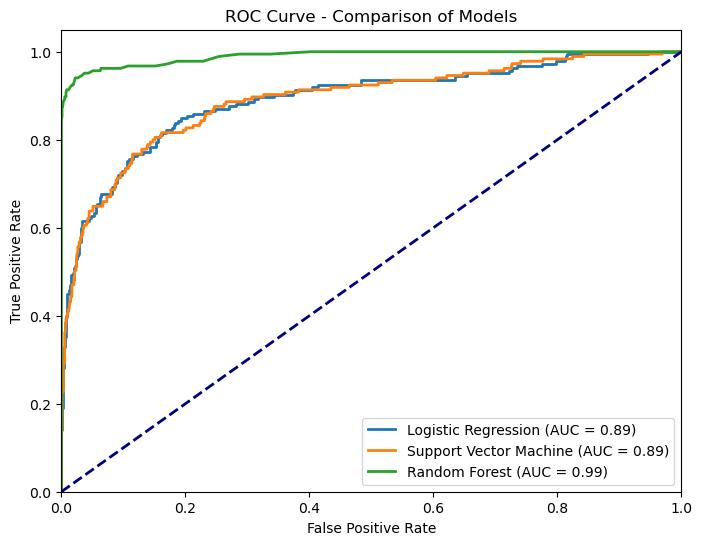

In [31]:
plot_roc_curve(models, X_test, y_test)

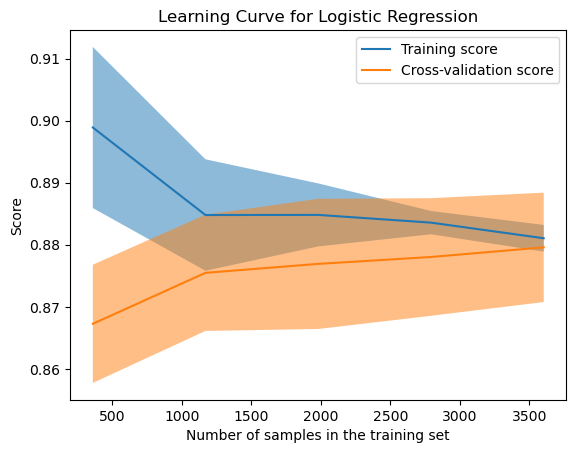

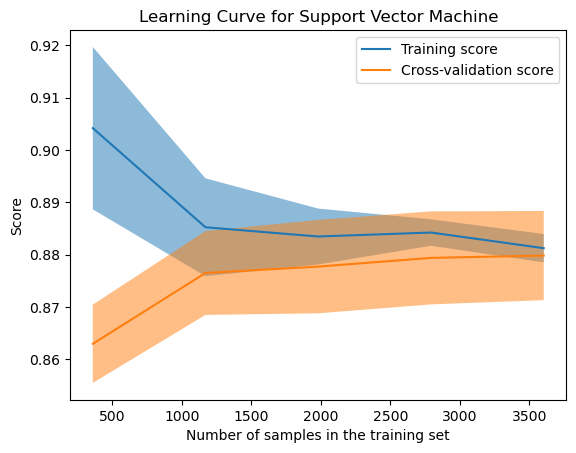

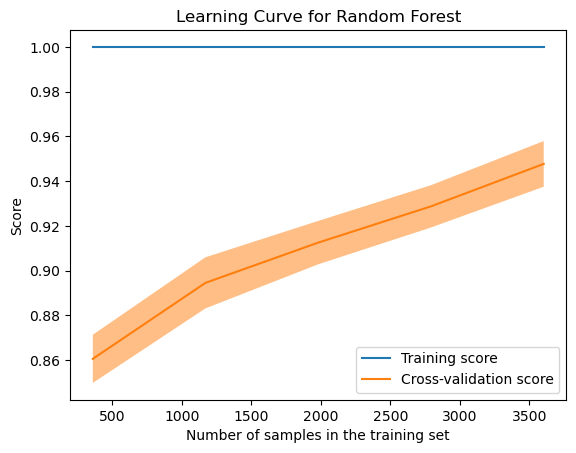

In [32]:
plot_learning_curve(models, X_train, y_train, cv)

### Model Analysis

**Random Forest Performance:**
- Random Forest outperformed Logistic Regression and SVM, achieving higher Test Accuracy (92.87%) and ROC AUC (94.63%).
- This indicates better generalisation, particularly in distinguishing between churn and non-churn customers.

**Precision and Recall:**
- Precision is highest for Random Forest at 86.54%, meaning it is better at identifying churned customers without mislabeling non-churned customers.
- Recall is also higher for Random Forest, indicating it captures a higher proportion of actual churn cases (61.35%) compared to Logistic Regression and SVM.

**Overfitting in Random Forest:**
- Random Forest's Train Accuracy (100%) indicates potential overfitting, which is a common issue with tree-based models.
- Further tuning (e.g., using max_depth, reducing the number of trees) or cross-validation can help prevent this overfitting.

**Limitations:**
- SVM and Logistic Regression show relatively lower recall, which means they miss identifying a higher number of actual churned customers.
- Random Forest performs well but shows signs of overfitting. Model complexity should be addressed in further iterations.

## Actionable Next Steps 

1. Focus Retention Efforts on High CLV Customers:
Customers with a higher CLV who are likely to churn should be prioritised for retention. Develop personalised offers (discounts, loyalty programs) to incentivise their continued engagement.

2. Targeted Campaigns Based on Churn Propensity:
Use the Random Forest model to score customers on their likelihood to churn. Segment these customers and create targeted outreach campaigns focusing on high-risk churn segments, offering personalised retention incentives.

3. Optimize Marketing Spend:
Shift marketing resources towards retaining existing customers with high churn risk rather than acquiring new customers, as retention strategies are more cost-effective than new customer acquisition.